# More Basics of Image Processing

## Basic Setup and Cloning the repository

In [1]:
!git clone https://github.com/vanshg1729/cvit-workshop-2024.git

Cloning into 'cvit-workshop-2024'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 66 (delta 7), reused 60 (delta 6), pack-reused 0
Receiving objects: 100% (66/66), 4.71 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [5]:
import os
import sys

REPO_DIR = "/content/cvit-workshop-2024"
assert os.path.exists(REPO_DIR), f"{REPO_DIR} does not exists"

IMAGES_DIR = os.path.join(REPO_DIR, "day1/images")
print(f"{IMAGES_DIR}, exists = {os.path.exists(IMAGES_DIR)}")

/content/cvit-workshop-2024/day1/images, exists = True


In [3]:
# Importing basic libraries
import numpy as np
import copy
import cv2
from google.colab.patches import cv2_imshow
import math
from collections import defaultdict
from matplotlib import pyplot as plt

In [4]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Erosion and Dilation

### Isolate the structure
Try to isolate the middle square `structure.jpeg` so that it looks like `structure_isolated.jpeg`

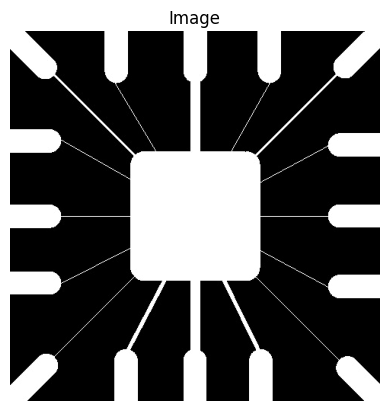

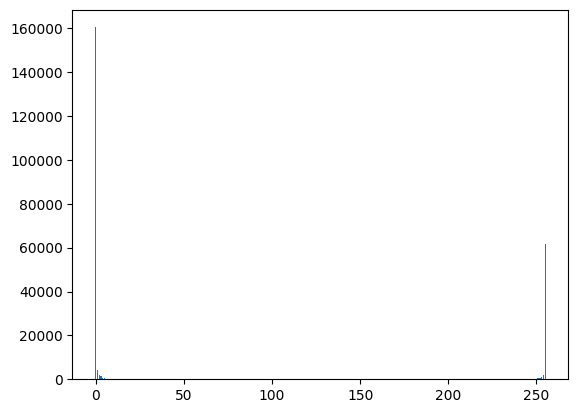

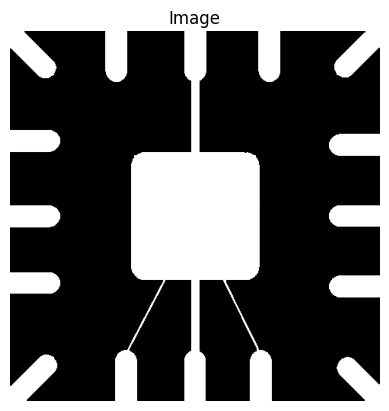

In [39]:
img_path = os.path.join(IMAGES_DIR, "structure.jpeg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(np.uint8).clip(0, 255)
show_image(img)

kernel = np.ones((3, 3))

[rows, columns] = img.shape

pixel_values = np.bincount(img.flatten())
plt.bar(list(range(256)), pixel_values)
plt.show()

for i in range(rows):
  for j in range(columns):
    if (img[i,j] > 100):
      img[i,j] = 255
    else:
      img[i,j] = 0

img_eroded = cv2.erode(img, kernel, iterations = 1)
show_image(img_eroded, 'Image', "gray")

Shape of grayscale image : (486, 486)


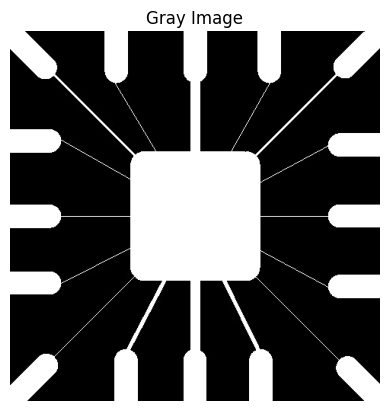

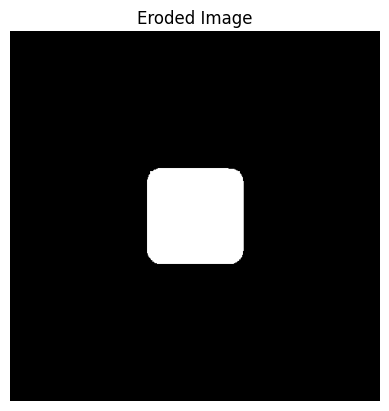

In [30]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "structure.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Shape of grayscale image : {gray_image.shape}")
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
#
ksize = 45 # kernel size for Erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image(eroded_image, "Eroded Image")

### Fix the Broken Text
Read `text_broken.jpeg` and try to fix the broken characters so it looks closer to `text_fixed.jpeg`

Shape of grayscale image : (444, 508)


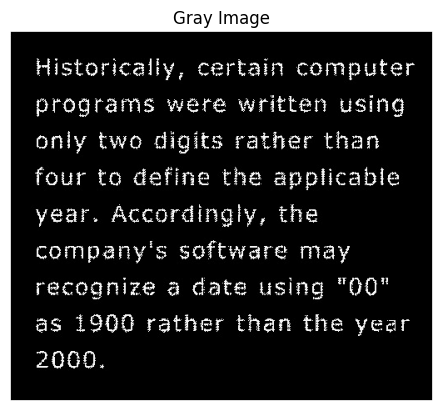

Shape of grayscale image : (444, 508)


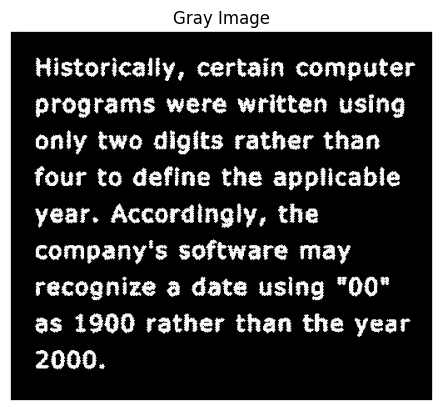

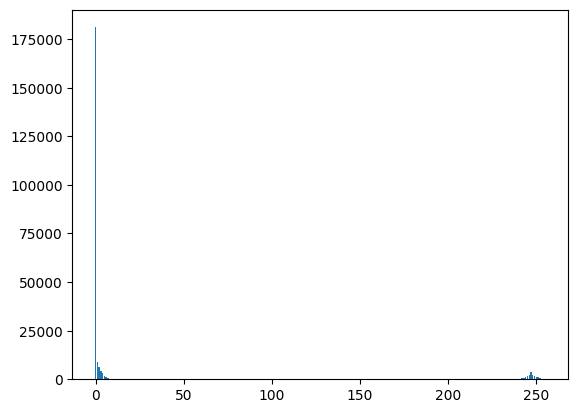

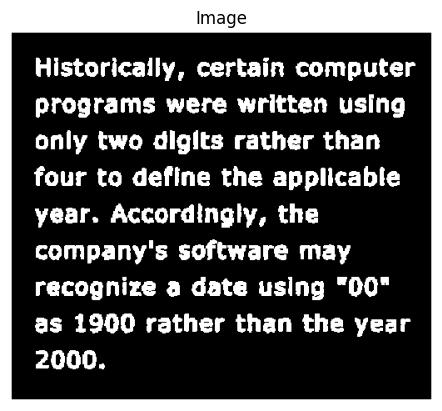

In [43]:
img_path = os.path.join(IMAGES_DIR, "text_broken.jpeg")
img_bt = cv2.imread(img_path)
gray_img_bt = cv2.cvtColor(img_bt, cv2.COLOR_BGR2GRAY)
print(f"Shape of grayscale image : {gray_img_bt.shape}")
show_image(gray_img_bt, "Gray Image")

img_path = os.path.join(IMAGES_DIR, "text_fixed.jpeg")
img_new = cv2.imread(img_path)
gray_img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2GRAY)
print(f"Shape of grayscale image : {gray_img_new.shape}")
show_image(gray_img_new, "Gray Image")

kernel = np.ones((3, 3))

[rows, columns] = gray_img_bt.shape

pixel_values = np.bincount(gray_img_bt.flatten())
plt.bar(list(range(256)), pixel_values)
plt.show()

for i in range(rows):
  for j in range(columns):
    if (gray_img_bt[i,j] > 100):
      gray_img_bt[i,j] = 255
    else:
      gray_img_bt[i,j] = 0

img_fixed = cv2.dilate(gray_img_bt, kernel, iterations = 1)
show_image(img_fixed, 'Image', "gray")


In [ ]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "text_broken.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Image after dilation")

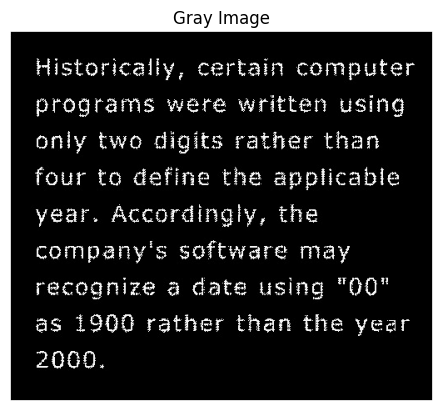

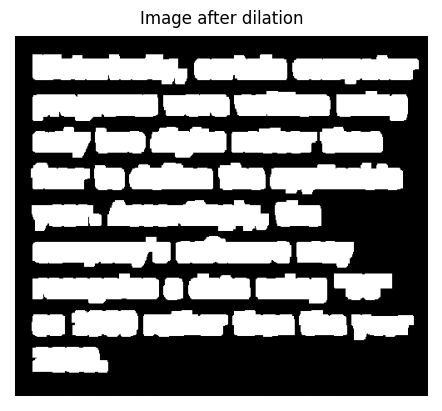

In [44]:
#@title Segmenting Words

# You can also segment the words if use dilate with a bigger kernel size

# Load the input image
img_path = os.path.join(IMAGES_DIR, "text_broken.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 11
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Image after dilation")


### Remove Noise from fingerprint
Try to remove the background noise from `fingerprint_noise.jpeg` while preserving as much of the fingerprint as possible.

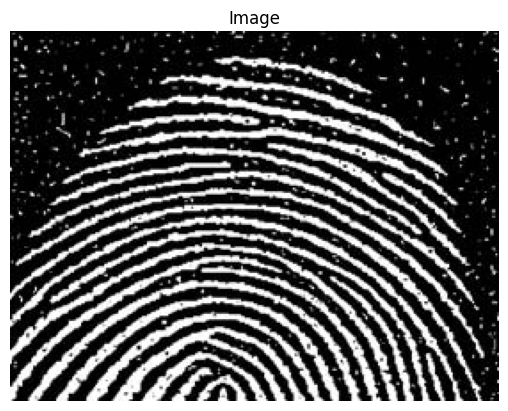

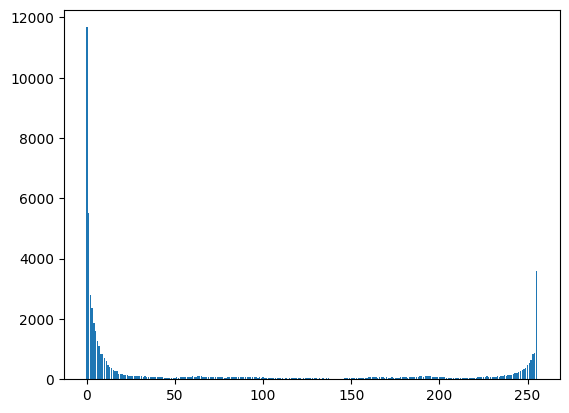

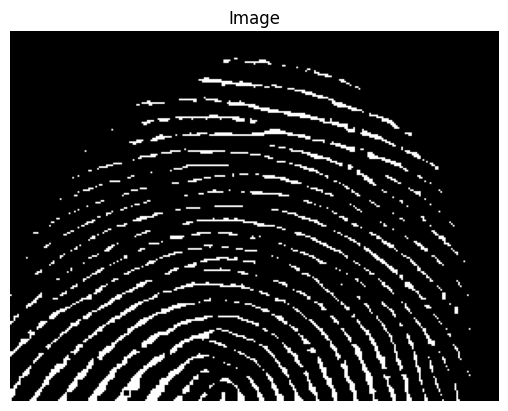

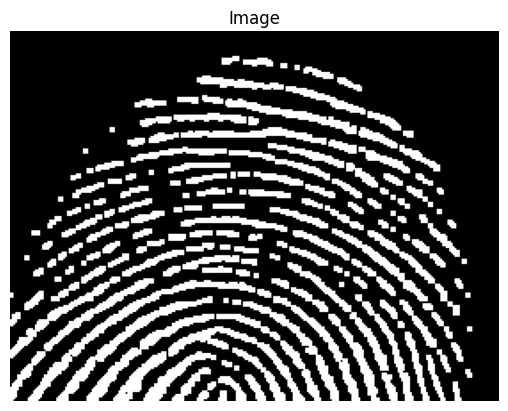

In [49]:
img_path = os.path.join(IMAGES_DIR, "fingerprint_noise.jpeg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(np.uint8).clip(0, 255)
show_image(img)

kernel = np.ones((3, 3))

[rows, columns] = img.shape

pixel_values = np.bincount(img.flatten())
plt.bar(list(range(256)), pixel_values)
plt.show()

for i in range(rows):
  for j in range(columns):
    if (img[i,j] > 100):
      img[i,j] = 255
    else:
      img[i,j] = 0

img_erode = cv2.erode(img, kernel, iterations = 1)
show_image(img_erode, 'Image', "gray")


img_dilated = cv2.dilate(img_erode, kernel, iterations = 1)
show_image(img_dilated, 'Image', "gray")

In [ ]:
#@title Solution
img_path = os.path.join(IMAGES_DIR, "fingerprint_noise.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))  # k x k rectangle structuring element

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image(eroded_image, "Eroded Image")

# Apply dilation
opened_image = cv2.dilate(eroded_image, kernel, iterations=2)
show_image(opened_image, "Opened Image")

# Apply erosion
final_image = cv2.erode(opened_image, kernel, iterations=1)
show_image(final_image, "Final Image")

### Fill the Holes
Fill the holes in `blobs.jpeg` without changing the size of the blobs roughly.

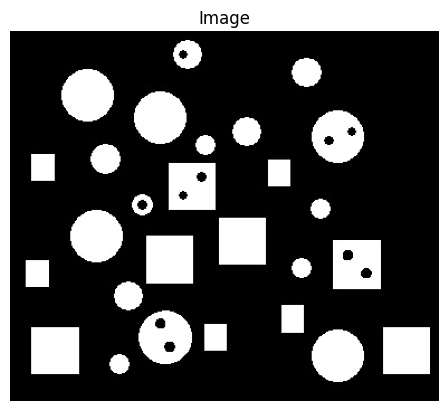

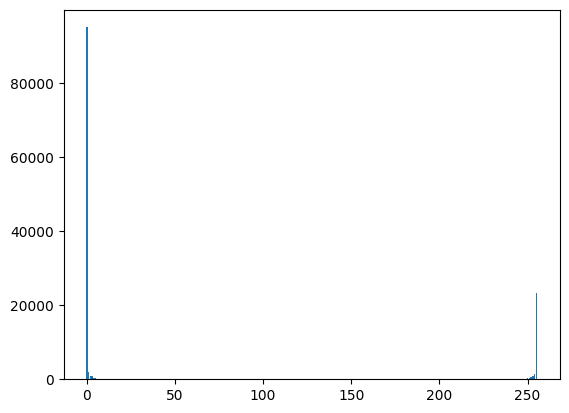

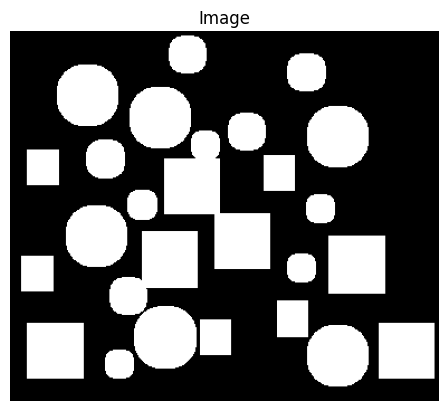

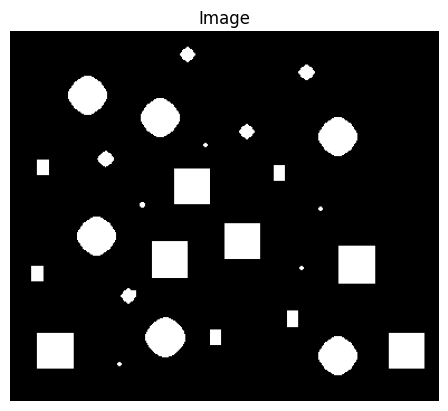

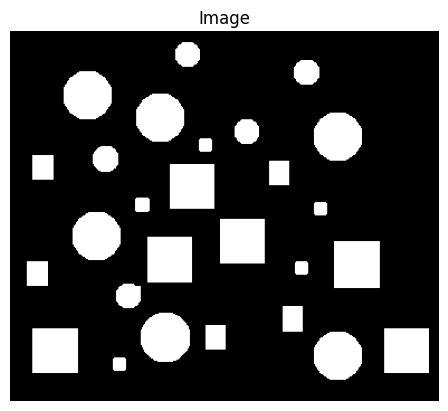

In [63]:
img_path = os.path.join(IMAGES_DIR, "blobs.jpeg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(np.uint8).clip(0, 255)
show_image(img)

kernel = np.ones((9, 9))

[rows, columns] = img.shape

pixel_values = np.bincount(img.flatten())
plt.bar(list(range(256)), pixel_values)
plt.show()

for i in range(rows):
  for j in range(columns):
    if (img[i,j] > 100):
      img[i,j] = 255
    else:
      img[i,j] = 0

img_dilated = cv2.dilate(img, kernel, iterations = 1)
show_image(img_dilated, 'Image', "gray")

kernel = np.ones((19, 19))
img_erode = cv2.erode(img_dilated, kernel, iterations = 1)
show_image(img_erode, 'Image', "gray")

kernel = np.ones((9, 9))
img_dilated = cv2.dilate(img_erode, kernel, iterations = 1)
show_image(img_dilated, 'Image', "gray")

In [ ]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "blobs.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 9
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize)) # k x k rectangle structuring element

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Dilated Image")

# Apply erosion
closed_image = cv2.erode(dilated_image, kernel, iterations=1)
show_image(closed_image, "Closed Image")


## Gradients, Edges and Blurring

### Sobel Filter
Apply Sobel filter in X and Y directions on `lotus.jpg` and display it's result. Also find the magnitude of the gradient and plot that as well.

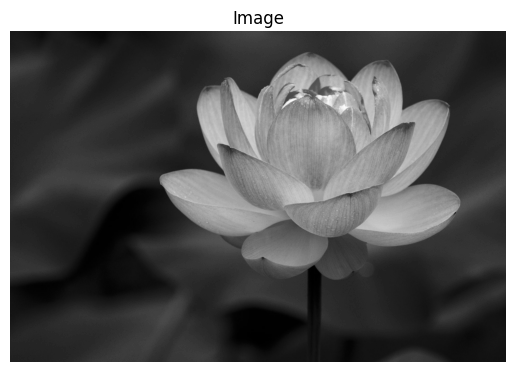

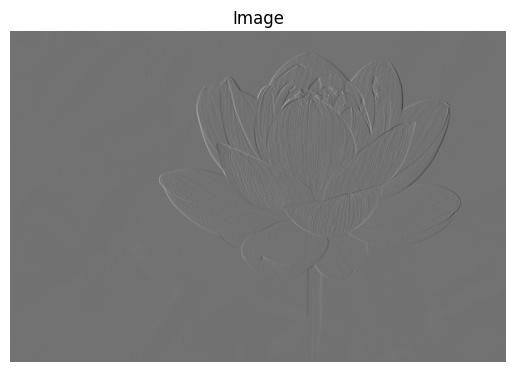

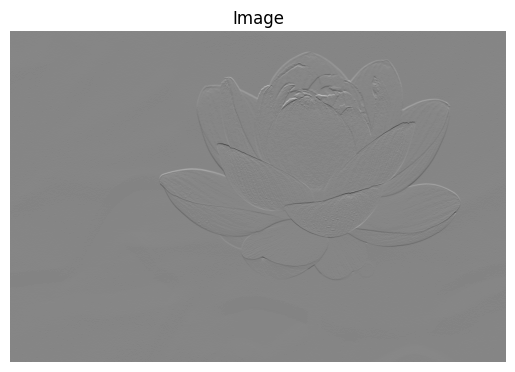

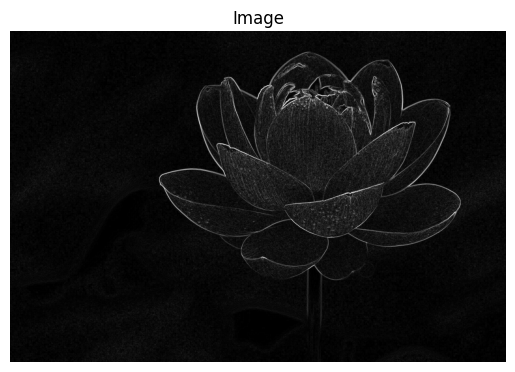

In [119]:
img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(np.uint8).clip(0, 255)
show_image(img)

sobel_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize = 3)
show_image(sobel_x)
sobel_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize = 3)
show_image(sobel_y)

final_img = np.sqrt(sobel_x*sobel_x + sobel_y*sobel_y)
final_img = cv2.convertScaleAbs(final_img)
show_image(final_img)

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
lotus_image = cv2.imread(img_path)
lotus_gray = cv2.cvtColor(lotus_image, cv2.COLOR_BGR2GRAY)
show_image(lotus_gray, "GrayScale Lotus")

# Gradient along X direction
gradX = cv2.Sobel(lotus_gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
show_image(gradX, "Gradient along X direction")

# Gradient along Y direction
gradY = cv2.Sobel(lotus_gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
show_image(gradY, "Gradient along Y direction")

# Absolute gradient
gradient = np.sqrt((gradX * gradX) + (gradY * gradY))
gradient = cv2.convertScaleAbs(gradient)
show_image(gradient, "Final Gradient Image")


### Blurring
Apply Gaussian blurring on `lotus.jpg`

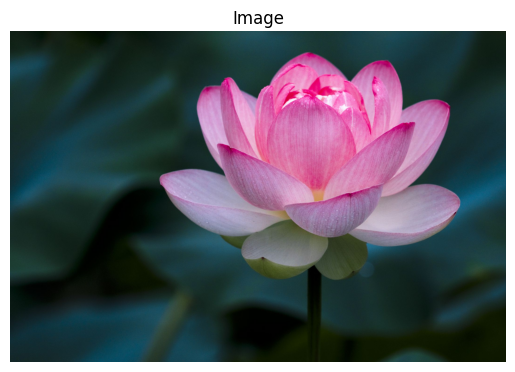

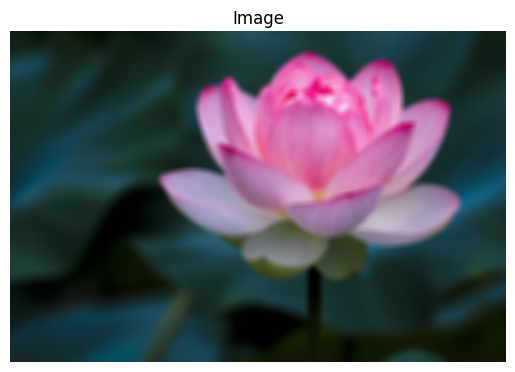

In [77]:
img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.uint8).clip(0, 255)
show_image(img)

img_GaussBlur = cv2.GaussianBlur(img, (31, 31), sigmaX = 100, sigmaY = 100)
show_image(img_GaussBlur)

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
lotus_image = cv2.imread(img_path)
lotus_gray = cv2.cvtColor(lotus_image, cv2.COLOR_BGR2GRAY)
show_image(lotus_gray, "GrayScale Lotus")

# Applying Gaussian Blur
ksize = 31
lotus_blurred = cv2.GaussianBlur(lotus_gray, (ksize, ksize), 0)
show_image(lotus_blurred, "Blurred Image")